<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Matin Mirzababaei

**Student ID**: 400102114





## Importing Libraries

First we import libraries that we need for this assignment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import any other libraries needed below

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

C:\Users\Matin\AppData\Local\Temp\ipykernel_10688\3629025157.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [3]:
X, Y = None, None

### START CODE HERE ###

# Read data from CSV file
# data = pd.read_csv('data_logistic.csv')
data = pd.read_csv('data3_logistic.csv')

# Extract features (X) and labels (Y)
X = data[['X1', 'X2', 'X3']].values
Y = data['Y'].values

### END CODE HERE ###

print("X shape:",X.shape)
print("Y shape:",Y.shape)

X shape: (10000, 3)
Y shape: (10000,)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**:

Normalizing the data is important for several reasons:

1- Scale invariance: Different features may have different scales, which can lead to issues in certain machine learning algorithms. Normalizing the data ensures that each feature has a similar scale, preventing any one feature from dominating the others.

2- Faster convergence: Normalizing the data often leads to faster convergence during training, especially for algorithms like gradient descent, as it helps to avoid oscillations and ensures smoother updates of the model parameters.

3- Improved performance: Normalization can lead to improved performance of the model, making it easier for the algorithm to find an optimal solution and potentially resulting in better generalization to unseen data.

4- Regularization Effects: Some machine learning algorithms, such as those based on distance metrics (e.g., K-Nearest Neighbors), can be sensitive to feature scales. Normalization mitigates this sensitivity, preventing biased predictions.

5- Interpretability: Normalization makes it easier to interpret the importance of features in the model. Since all features are on the same scale, their coefficients or weights are directly comparable.


In [5]:
### START CODE HERE ###

# Calculate mean and std
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

print("Mean of X:")
print(X_mean)
print("Std of X")
print(X_std)

X_normalized = (X - X_mean) / X_std

# New shape of X_normalized
print("Shape of X_normalized:", X_normalized.shape) # No need to normalize Y since it's a binary class label

print("Normalized X:")
print(X_normalized[:5])

### END CODE HERE ###

Mean of X:
[403.99692301  28.79020375  24.44609525]
Std of X
[289.07314796  79.48672385  40.85426333]
Shape of X_normalized: (10000, 3)
Normalized X:
[[-1.49325465 -1.16910378 -0.832399  ]
 [-0.8759156  -0.75095122  0.96152516]
 [ 0.72311888  0.33215587 -0.70781649]
 [ 1.05290005 -0.14910096  0.64297227]
 [ 0.7698547   0.0163137   0.76946648]]


Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [7]:
### START CODE HERE ###
# Add a column of 1s to X_normalized
X_with_bias = np.column_stack((np.ones(X_normalized.shape[0]), X_normalized))


print("X with Bias:")
print(X_with_bias[:5])

### END CODE HERE ###

print(X_with_bias.shape)
X = X_with_bias


X with Bias:
[[ 1.         -1.49325465 -1.16910378 -0.832399  ]
 [ 1.         -0.8759156  -0.75095122  0.96152516]
 [ 1.          0.72311888  0.33215587 -0.70781649]
 [ 1.          1.05290005 -0.14910096  0.64297227]
 [ 1.          0.7698547   0.0163137   0.76946648]]
(10000, 4)


## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [8]:
def sigmoid(Z):
    '''
    Applies the sigmoid function on every element of Z
    Arguments:
        Z can be a (n,) vector or (n , m) matrix
    Returns:
        A vector/matrix, same shape with Z, that has the sigmoid function applied elementwise
    '''
    ### START CODE HERE ###
    return 1 / (1 + np.exp(-Z))

    ### END CODE HERE ###

In [9]:
# Test with a scalar
print(sigmoid(0))  # Output should be approximately 0.5

# Test with a vector
print(sigmoid(np.array([-10, 0, 10])))  # Output should be [approx. 0, 0.5, 1]

# Test with a matrix
print(sigmoid(np.array([[-1, 0], [0, 1]])))  # Output should be [[approx. 0.26894142, 0.5], [0.5, approx. 0.73105858]]


0.5
[4.53978687e-05 5.00000000e-01 9.99954602e-01]
[[0.26894142 0.5       ]
 [0.5        0.73105858]]


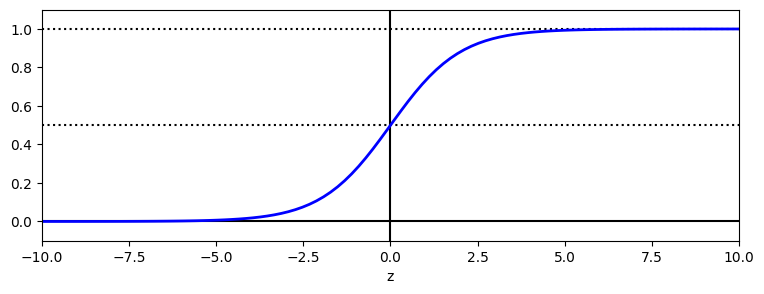

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
z = np.linspace(-10, 10, 100)
sig = sigmoid(z)
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(z, sig, "b-", linewidth=2)
plt.xlabel("z")
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

### Cost Function 
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [12]:
def computeCost(theta, X, y, regLambda):
    '''
    Computes the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
    '''
    
    m, n = X.shape
    loss = None
    
    ### START CODE HERE ###
    
    # the hypothesis
    h = sigmoid(np.dot(X, theta))
    

    cost = (-1) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    
    # regularization term (exclude bias term theta0)
    reg_term = (regLambda / (2)) * np.sum(theta[1:] ** 2)
    
    # Total cost with regularization
    loss = cost + reg_term    
    
    # This is Optional!!!
    loss = loss / m

    ### END CODE HERE ###
    
    return loss



In [13]:
# Test with sample data
theta_test = np.array([0, 1, 1, 1])

regLambda_test = 0.001
cost = computeCost(theta_test, X, Y, regLambda_test)
print("Cost:", cost)


Cost: 0.8311071863708779


### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer:


$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_j} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})x_j^{(i)} + \frac{\lambda}{m} \theta_j
$$


In [23]:
def computeGradient(theta, X, y, regLambda):
    '''
    Computes the gradient of the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        the gradient, an d-dimensional vector
    '''
    
    m, n = X.shape
    grad = None
    ### START CODE HERE ###
    
    
    # the hypothesis
    h = sigmoid(np.dot(X, theta))
        
    # gradient without regularization
    grad = (1 / m) * np.dot(X.T, (h - y))
    
    
    # regularization term (exclude bias term theta0)
    reg_term = (regLambda / m) * np.concatenate(([0], theta[1:]))
    
    grad += reg_term

    ### END CODE HERE ###
    return grad

### Training and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [22]:
def fit(X, y, regLambda = 0.01, alpha = 0.01, epsilon = 1e-4, maxNumIters = 100):
    '''
    Trains the model
    Arguments:
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        maxNumIters is the maximum number of gradient descent iterations
        regLambda   is the scalar regularization constant
        epsilon     is the convergence rate
        alpha       is the gradient descent learning rate
    '''
    
    m, n = X.shape
    theta, loss_history = None, None 
    ### START CODE HERE ###
    
    theta = np.zeros(n)  
    loss_history = []  
    
    # Perform GD
    for _ in range(maxNumIters):

        grad = computeGradient(theta, X, y, regLambda)
        
        # Update theta
        theta_new = theta - alpha * grad
        
        # Check for convergence
        if hasConverged(theta, theta_new, epsilon):
            break
        
        # Update theta and append loss to history
        theta = theta_new
        loss = computeCost(theta, X, y, regLambda)
        loss_history.append(loss)


    ### END CODE HERE ###
    
    return theta, np.array(loss_history)
    


def hasConverged(theta_old, theta_new, epsilon):
    '''
    Return if the theta converged or not
    Arguments:
        theta_old   is the theta calculated in prevoius iteration
        theta_new   is the theta calculated in current iteration
        epsilon     is the convergence rate
    '''
    
    ### START CODE HERE ###
    
    if np.linalg.norm(theta_new - theta_old) <= epsilon:
        return True

    ### END CODE HERE ###
    return False

Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

In [25]:
theta, loss_history = fit(X, Y) # calculating theta and loss of each iteration

### START CODE HERE ###


print("Final Theta:", theta) # final theta

# loss of each iteration
print("Loss History:")
for i, loss in enumerate(loss_history):
    print("Iteration {}: Loss = {}".format(i+1, loss))

### END CODE HERE ###

Final Theta: [-0.06069489 -0.16557965  0.29972024  0.00508142]
Loss History:
Iteration 1: Loss = 0.6916080637617289
Iteration 2: Loss = 0.6900767197648195
Iteration 3: Loss = 0.688553109129314
Iteration 4: Loss = 0.6870371924712133
Iteration 5: Loss = 0.6855289304654585
Iteration 6: Loss = 0.6840282838489137
Iteration 7: Loss = 0.6825352134232974
Iteration 8: Loss = 0.6810496800580603
Iteration 9: Loss = 0.6795716446932116
Iteration 10: Loss = 0.6781010683420922
Iteration 11: Loss = 0.6766379120940973
Iteration 12: Loss = 0.6751821371173446
Iteration 13: Loss = 0.6737337046612927
Iteration 14: Loss = 0.6722925760593064
Iteration 15: Loss = 0.6708587127311715
Iteration 16: Loss = 0.6694320761855571
Iteration 17: Loss = 0.668012628022428
Iteration 18: Loss = 0.666600329935405
Iteration 19: Loss = 0.6651951437140757
Iteration 20: Loss = 0.6637970312462537
Iteration 21: Loss = 0.6624059545201885
Iteration 22: Loss = 0.6610218756267254
Iteration 23: Loss = 0.6596447567614164
Iteration 24: L

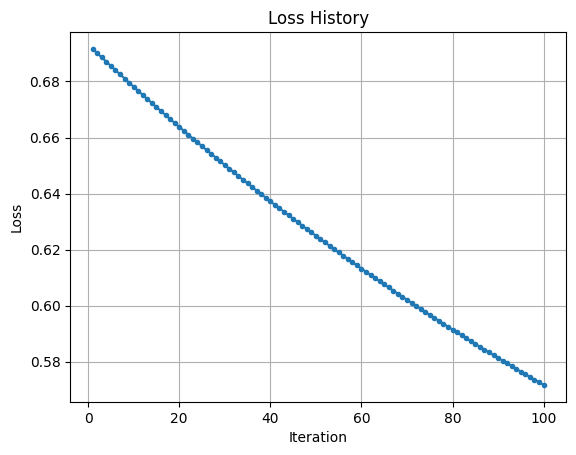

In [26]:
# Plot loss history
plt.plot(range(1, len(loss_history) + 1), loss_history, marker='.', linestyle='-')
plt.title('Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [27]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###

# Split the dataset into 70% training, 20% validation, and 10% test sets
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.2222, random_state=42)

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_val shape:", X_val.shape)
print("Y_val shape:", Y_val.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

### END CODE HERE ###

X_train shape: (7000, 4)
Y_train shape: (7000,)
X_val shape: (2000, 4)
Y_val shape: (2000,)
X_test shape: (1000, 4)
Y_test shape: (1000,)


Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [28]:
def predict(X, theta):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''
    
    Y = None
    ### START CODE HERE ###
    
    h_theta = sigmoid(np.dot(X, theta))
    
    # Predict binary values (0 or 1) based on the hypothesis
    Y = (h_theta > 0.5).astype(int)

    ### END CODE HERE ###
    return Y

Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**:


**Effect of Learning Rate and Regularization Constant:**
- Learning Rate: A higher learning rate can help the model converge faster, but if it's too high, it may lead to oscillations or divergence. Conversely, a lower learning rate may result in slower convergence but more stable updates. It's essential to choose a learning rate that balances convergence speed and stability.
- Regularization Constant: Regularization helps prevent overfitting by penalizing large parameter values. A higher regularization constant increases the penalty for large parameters, leading to simpler models with smaller parameter values. However, too much regularization can lead to underfitting. It's crucial to choose a regularization constant that balances model complexity and generalization performance.

**Finding the Best Values:**
- To find the best values of the learning rate and regularization constant, you can observe the behavior of the loss on both the train and validation sets. Look for combinations that achieve low loss values on both sets, indicating good generalization performance.
- Additionally, consider other factors such as convergence speed and stability. A good combination should lead to fast convergence without oscillations or divergence.
- Experiment with different combinations and choose the one that performs best on the validation set.
- Finally, evaluate the chosen combination on the test set to ensure its generalization performance.

* I choose the learning rate(Alpha) and regularization constant later.

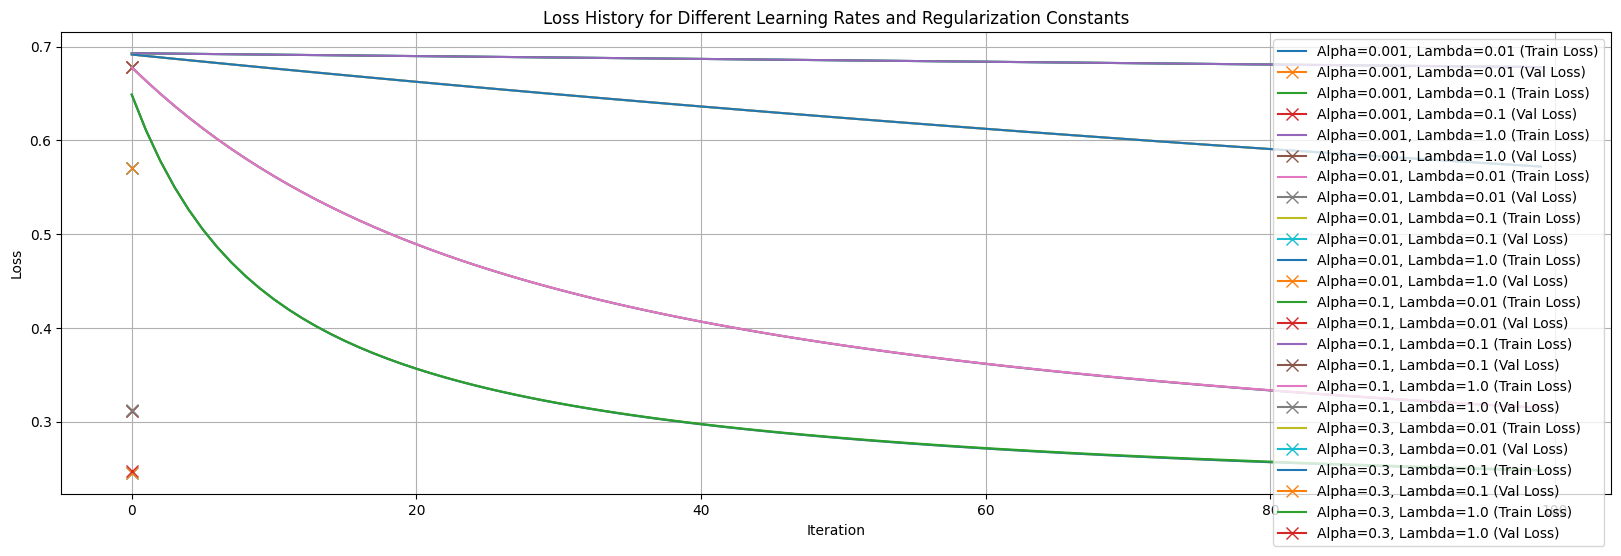

In [73]:


learning_rates = [0.001, 0.01, 0.1, 0.3]
regularization_constants = [0.01, 0.1, 1.0]

train_loss_histories = {}
val_loss_histories = {}


for alpha in learning_rates:
    for regLambda in regularization_constants:
        # Train the model
        theta, train_loss_history = fit(X_train, Y_train, regLambda=regLambda, alpha=alpha)
        
        train_predictions = predict(X_train, theta)
        val_predictions = predict(X_val, theta)
        
        # loss on train and validation data
        train_loss = computeCost(theta, X_train, Y_train, regLambda=regLambda)
        val_loss = computeCost(theta, X_val, Y_val, regLambda=regLambda)
        
        # loss histories
        key = (alpha, regLambda)
        train_loss_histories[key] = train_loss_history
        val_loss_histories[key] = val_loss


plt.figure(figsize=(20, 6))
for key, train_loss_history in train_loss_histories.items():
    alpha, regLambda = key
    plt.plot(train_loss_history, label=f'Alpha={alpha}, Lambda={regLambda} (Train Loss)')
    plt.plot(val_loss_histories[key], marker='x', markersize=8, label=f'Alpha={alpha}, Lambda={regLambda} (Val Loss)')
plt.title('Loss History for Different Learning Rates and Regularization Constants')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [83]:
# Choose the best learning rate and regularization constant
best_alpha = 0.3
best_regLambda = 0.1


# Train the logistic regression model using the best parameters
theta, _ = fit(X_train, Y_train, regLambda=best_regLambda, alpha=best_alpha)


test_predictions = predict(X_test, theta)


test_accuracy = np.mean(test_predictions == Y_test) * 100

print("Logistic Regression Validation Accuracy on Test Set:", test_accuracy, "%")


Logistic Regression Validation Accuracy on Test Set: 91.3 %


: 

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:

In [35]:
### START CODE HERE ###


nb_classifier = GaussianNB()

# Train the classifier on the training set
nb_classifier.fit(X_train, Y_train)

Y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy of Gaussian Naive Bayes classifier on test set:", accuracy)


### END CODE HERE ###

Accuracy of Gaussian Naive Bayes classifier on test set: 0.894


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:

In [36]:
### START CODE HERE ###


lda_classifier = LinearDiscriminantAnalysis()

# Train the classifier on the training set
lda_classifier.fit(X_train, Y_train)

Y_pred_lda = lda_classifier.predict(X_test)

accuracy_lda = accuracy_score(Y_test, Y_pred_lda)

print("Accuracy of Linear Discriminant Analysis classifier on test set:", accuracy_lda)


### END CODE HERE ###

Accuracy of Linear Discriminant Analysis classifier on test set: 0.905


## Conclusion

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**:

Based on the provided validation and test accuracies, it appears that the Logistic Regression classifier performs slightly better than both the Gaussian Naive Bayes classifier and the Linear Discriminant Analysis classifier on this dataset.

Here are the accuracies on the test set for each classifier:
- Logistic Regression: 91.3%
- Gaussian Naive Bayes: 89.4%
- Linear Discriminant Analysis: 90.5%

The best accuracy on the test set is achieved by the Logistic Regression classifier, with an accuracy of 91.3%.

Therefore, based on the test set performance, the Logistic Regression classifier seems to be the best method for classifying this dataset. (LDA seemed proper as well)